# Task 1: Working with data in julia

>In this unit we will focus on how to deal with data in julia. The first part involves elementary data management operations (e.g., import, conversion, output). In the second we will focus on plotting data. 

In [2]:
using Pkg
#Pkg.add("DataFrames");
#Pkg.add("CSV");
#Pkg.add("Dates");  # needed to handle date/time formatting
#Pkg.add("Statistics");  # needed to handle statistic functions
Pkg.status()

      Status `C:\Users\ignga\.julia\environments\v1.7\Project.toml`
  [336ed68f] CSV v0.10.2
  [9961bab8] Cbc v0.9.1
  [e2554f3b] Clp v0.9.1
  [a93c6f00] DataFrames v1.3.3
  [7073ff75] IJulia v1.23.2
  [4076af6c] JuMP v0.22.2
  [442fdcdd] Measures v0.3.1
  [f3b207a7] StatsPlots v0.14.30
  [ade2ca70] Dates
  [10745b16] Statistics


In [3]:
using DataFrames, CSV, Dates, Statistics; #load packages

## Part 1) Data mingling

### 1.1) Construct complete data sets for Chicago and Potsdam for 2015

#### 1.1.1) Chicago

#### Import the data of Chicago based on local time from .csv (01/01/2015-12/31/2015)

In [8]:
CH_15_df = CSV.read("data/PV_generation_Chicago_10kW_0loss_2015.csv", DataFrame,
   select=[2,3,6], # what is happening here?
   header=4,    # what is happening here?
   dateformat=dateformat"m/d/yyyy HH:MM" # what is happening here? 
    );
#CH_15_df = filter(r -> r.local_time >= DateTime(2015), CH_15_df);

first(CH_15_df,8) # what is happening here?

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2014-12-31T18:00:00,0.0,-6.695
2,2014-12-31T19:00:00,0.0,-6.693
3,2014-12-31T20:00:00,0.0,-6.74
4,2014-12-31T21:00:00,0.0,-6.846
5,2014-12-31T22:00:00,0.0,-7.106
6,2014-12-31T23:00:00,0.0,-7.328
7,2015-01-01T00:00:00,0.0,-7.488
8,2015-01-01T01:00:00,0.0,-7.637


All there?

In [4]:
size(CH_15_df) # number of data points

(8760, 3)

In [6]:
last(CH_15_df,2) # print last 

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2015-12-31T16:00:00,0.0,-3.462
2,2015-12-31T17:00:00,0.0,-4.485


>Inspect the imported data. What do you notice? What is yet to be done to compile a complete data set of 2015?

#### Modify data set to include all data points for 2015

In [8]:
# Import data of 2016 into Dataframe CH_16_df
CH_16_df = CSV.read("data/PV_generation_Chicago_10kW_0loss_2016.csv", DataFrame,
   select=[2,3,6], # what is happening here?
   header=4,    # what is happening here?
   dateformat=dateformat"m/d/yyyy HH:MM"  # what is happening here?
    );

first(CH_16_df,8) # what is happening here?

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2015-12-31T18:00:00,0.0,-5.308
2,2015-12-31T19:00:00,0.0,-5.897
3,2015-12-31T20:00:00,0.0,-6.22
4,2015-12-31T21:00:00,0.0,-6.302
5,2015-12-31T22:00:00,0.0,-6.056
6,2015-12-31T23:00:00,0.0,-5.947
7,2016-01-01T00:00:00,0.0,-6.08
8,2016-01-01T01:00:00,0.0,-6.389


In [11]:
# what is happening here?
CH_df = append!(CH_15_df[7:end,:], CH_16_df[1:6,:]); 
last(CH_df,3)

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2015-12-31T21:00:00,0.0,-6.302
2,2015-12-31T22:00:00,0.0,-6.056
3,2015-12-31T23:00:00,0.0,-5.947


#### 1.1.2) Potsdam 

#### Import the data of Potsdam based on local time from .csv (01/01/2015-12/31/2015)

>Take a look at the .csv file. What do you notice?

German format using ; and , instead of , and .!!!

In [9]:
P_15_df = CSV.read("data/PV_generation_Potsdam_10kW_0loss_2015_GermanFormat.csv", DataFrame,
    select=[2,3,6],
    header=4,
    delim=';', # what is happening here?
    decimal=',', # what is happening here?
    dateformat=dateformat"d.m.yyyy HH:MM"); # what is happening here?
first(P_15_df,5)

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2015-01-01T01:00:00,0.0,1.574
2,2015-01-01T02:00:00,0.0,1.47
3,2015-01-01T03:00:00,0.0,1.294
4,2015-01-01T04:00:00,0.0,1.139
5,2015-01-01T05:00:00,0.0,0.949


All there?

In [14]:
size(P_15_df)

(8760, 3)

In [15]:
last(P_15_df,5)

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2015-12-31T20:00:00,0.0,0.225
2,2015-12-31T21:00:00,0.0,0.223
3,2015-12-31T22:00:00,0.0,0.271
4,2015-12-31T23:00:00,0.0,0.197
5,2016-01-01T00:00:00,0.0,0.024


#### Modify data set to include all data points for 2015

In [11]:
# Import data of 2014 into Dataframe CH_14_df
P_14_df = CSV.read("data/PV_generation_Potsdam_10kW_0loss_2014_GermanFormat.csv", DataFrame,
    select=[2,3,6],
    header=4,
    delim=';', # what is happening here?
    decimal=',', # what is happening here?
    dateformat=dateformat"d.m.yyyy HH:MM"); # what is happening here?
last(P_14_df,5)
#size(P_14_df)
#P_14_df[8760,:]
#P_14_df = filter(r -> r.local_time >= DateTime(2015), P_14_df);

In [15]:
# Create DataFrame P_df that holds all data points for 2015; print last 3 entries
P_df = append!(P_14_df[8760:8760,:], P_15_df[1:8759,:]);
# I cannot use the append! function normally because it catched Error : ::DataFrameRow can't combined with ::DataFrame,
# so instead I filtered first the data from 2014 so i can get the last data and then used the whole DataFrame
P_df
#CH_df = append!(CH_15_df[7:end,:], CH_16_df[1:6,:]);

In [16]:
first(P_df,2)

,local_time,electricity,temperature
,DateTime,Float64,Float64
1,2015-01-01T00:00:00,0.0,1.667
2,2015-01-01T01:00:00,0.0,1.574


Same size?

In [30]:
size(CH_df), size(P_df)

((8760, 3), (8760, 3))

### 1.2) Merge both datasets and export to .csv file

In [31]:
# what is happening here?
df = innerjoin(CH_df, P_df, on=:local_time, makeunique=true); 
first(df,2)

,local_time,electricity,temperature,electricity_1,temperature_1
,DateTime,Float64,Float64,Float64,Float64
1,2015-01-01T00:00:00,0.0,-7.488,0.0,1.667
2,2015-01-01T01:00:00,0.0,-7.637,0.0,1.574


In [32]:
rename!(df, [:time, :CH_PV, :CH_temp, :P_PV, :P_temp]); # what is happening here?
first(df,2)

,time,CH_PV,CH_temp,P_PV,P_temp
,DateTime,Float64,Float64,Float64,Float64
1,2015-01-01T00:00:00,0.0,-7.488,0.0,1.667
2,2015-01-01T01:00:00,0.0,-7.637,0.0,1.574


In [33]:
CSV.write("data/pv_temp_both.csv", df); 

>Notice any potential problems with this approach?

### 1.3) Calculate monthly mean values

Add column with month indicator

In [34]:
df[:, :month] = Dates.month.(df[:, :time]); # what is happening here?

In [35]:
first(df,2)

,time,CH_PV,CH_temp,P_PV,P_temp,month
,DateTime,Float64,Float64,Float64,Float64,Int64
1,2015-01-01T00:00:00,0.0,-7.488,0.0,1.667,1
2,2015-01-01T01:00:00,0.0,-7.637,0.0,1.574,1


Now let's calculate the mean values using statistics package...

In [36]:
names(df)[2] # retrieves the name of the second column; just for clarification

"CH_PV"

In [39]:
# define new DataFrame that holds monthly mean values for CH_PV_mean; for details see: https://juliadatascience.io/groupby_combine; print first 2 elements
gdf = groupby(df, :month);
df_mean = combine(gdf, [:CH_PV] .=> mean);
first(df_mean, 2)


,month,CH_PV_mean
,Int64,Float64
1,1,1.34624
2,2,1.7304


In [40]:
# what is happening here?
for i in 3:5
    df_mean = innerjoin(df_mean, combine(groupby(df, :month), names(df)[i] => mean), on=:month)
end
df_mean 

,month,CH_PV_mean,CH_temp_mean,P_PV_mean,P_temp_mean
,Int64,Float64,Float64,Float64,Float64
1,1,1.34624,-4.39326,0.364073,1.42441
2,2,1.7304,-8.56853,1.21147,0.173976
3,3,2.2535,0.791311,1.3953,4.5937
4,4,2.22821,7.93118,1.99699,7.8453
5,5,2.10013,14.2891,2.25677,12.1865
6,6,2.18167,18.0814,2.21375,15.7885
7,7,2.31981,21.6561,2.32056,19.3374
8,8,2.28716,21.9508,2.09527,20.9783
9,9,2.02521,20.1964,1.77553,13.5115


In [41]:
Matrix(df_mean) # convert into array to speed up calculations

12×5 Matrix{Float64}:
  1.0  1.34624  -4.39326   0.364073   1.42441
  2.0  1.7304   -8.56853   1.21147    0.173976
  3.0  2.2535    0.791311  1.3953     4.5937
  4.0  2.22821   7.93118   1.99699    7.8453
  5.0  2.10013  14.2891    2.25677   12.1865
  6.0  2.18167  18.0814    2.21375   15.7885
  7.0  2.31981  21.6561    2.32056   19.3374
  8.0  2.28716  21.9508    2.09527   20.9783
  9.0  2.02521  20.1964    1.77553   13.5115
 10.0  1.75902  12.6682    1.10646    7.47255
 11.0  1.54619   7.66835   0.563119   6.35873
 12.0  0.94144   3.76062   0.413683   5.19703

### 1.4) Save to .csv file

In [42]:
CSV.write("data/pv_temp_monthly_mean.csv", df_mean); # export data to csv file

Break ☕😎

## Part 2) Visualization

In [ ]:
#In case you havn't done so, let's install some additional libraries

#using Pkg;
#Pkg.add("StatsPlots"); # we need this package for visualization
#Pkg.add("Measures"); # we need this package for displaying a second axis
#Pkg.status()

In [23]:
using StatsPlots, Measures

#these packages should be available from Task 1; if not, please activate again
#using DataFrames, CSV, Dates, Statistics 

### 2.1) Visualize monthly mean values

#### Import data from .csv into DataFrame (if no longer available from Task 1)

In [17]:
df_mean = CSV.read("data/pv_temp_monthly_mean.csv", DataFrame);

In [18]:
df_mean # print result

,month,CH_PV_mean,CH_temp_mean,P_PV_mean,P_temp_mean
,Int64,Float64,Float64,Float64,Float64
1,1,1.34624,-4.39326,0.364073,1.42441
2,2,1.7304,-8.56853,1.21147,0.173976
3,3,2.2535,0.791311,1.3953,4.5937
4,4,2.22821,7.93118,1.99699,7.8453
5,5,2.10013,14.2891,2.25677,12.1865
6,6,2.18167,18.0814,2.21375,15.7885
7,7,2.31981,21.6561,2.32056,19.3374
8,8,2.28716,21.9508,2.09527,20.9783
9,9,2.02521,20.1964,1.77553,13.5115


#### Let's create a combined chart of the PV generation and temperature of each month

In [19]:
x = 1:12 # x axis: initialize x as an 12x1 array with integer values 1 to 12

1:12

In [20]:
PV_mean = Matrix(df_mean[:,[2,4]]) # what is happening here?

12×2 Matrix{Float64}:
 1.34624  0.364073
 1.7304   1.21147
 2.2535   1.3953
 2.22821  1.99699
 2.10013  2.25677
 2.18167  2.21375
 2.31981  2.32056
 2.28716  2.09527
 2.02521  1.77553
 1.75902  1.10646
 1.54619  0.563119
 0.94144  0.413683

In [21]:
T_mean = Matrix(df_mean[:,[3,5]]) # what is happening here?

12×2 Matrix{Float64}:
 -4.39326    1.42441
 -8.56853    0.173976
  0.791311   4.5937
  7.93118    7.8453
 14.2891    12.1865
 18.0814    15.7885
 21.6561    19.3374
 21.9508    20.9783
 20.1964    13.5115
 12.6682     7.47255
  7.66835    6.35873
  3.76062    5.19703

┌ Warning: Skipped marker arg [:line :line].
└ @ Plots C:\Users\ignga\.julia\packages\Plots\Xv2qA\src\args.jl:1225


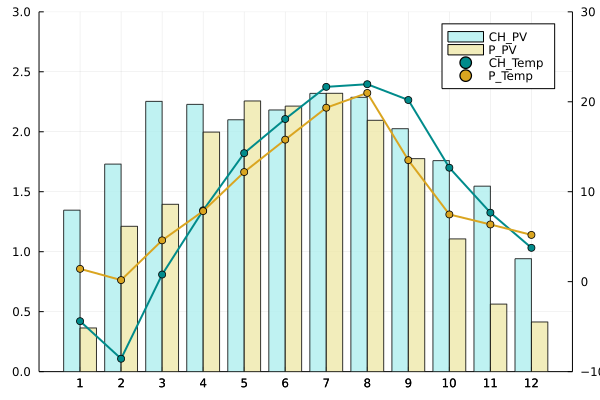

In [26]:
# first plot (PV bars)
# add labels to the axis and the legend
groupedbar(PV_mean,  colour = [:paleturquoise :palegoldenrod], alpha=0.8, label=["CH_PV" "P_PV"], 
    xlim=(0,13), xticks=x, ylim=(0,3), yticks=0:0.5:3, # what is happening here
    right_margin = 5mm) # what is happening here

# # what is happening here
scatter!((16:17)', xlim=(0,13), colour =[:darkcyan :goldenrod], legend=:best,
            label=["CH_Temp" "P_Temp"])

# # what is happening here
plot!(twinx(), T_mean, ylabel="Temperature [°C]", label=["CH_Temp" "P_Temp"], # function twinx() used for secondary y-achsis
    colour = [:darkcyan :goldenrod], linewidth= 2.0, marker=([:circle :circle], 4), legend=false, grid=false,
     xlim=(0,13), xticks=x, ylim=(-10,30))

#  -------> try some variations of the parameters to see the effect <---------

plot!(size=(600,400))

In [53]:
savefig("figures/PV_temp_monthly_means.pdf") # export to pdf
#savefig("figures/PV_temp_monthly_means.png")

### 2.2) Visualize confidence intervals

Load the initial merged DataFrame and add a column for the hour

In [60]:
df = CSV.read("data/pv_temp_both.csv", DataFrame);

# add column with information on hour of the day, print first five elements
df[:, :hour] = Dates.hour.(df[:, :time]);
df

,time,CH_PV,CH_temp,P_PV,P_temp,hour
,DateTime,Float64,Float64,Float64,Float64,Int64
1,2015-01-01T00:00:00,0.0,-7.488,0.0,1.667,0
2,2015-01-01T01:00:00,0.0,-7.637,0.0,1.574,1
3,2015-01-01T02:00:00,0.0,-7.813,0.0,1.47,2
4,2015-01-01T03:00:00,0.0,-7.984,0.0,1.294,3
5,2015-01-01T04:00:00,0.0,-8.147,0.0,1.139,4
6,2015-01-01T05:00:00,0.0,-8.221,0.0,0.949,5
7,2015-01-01T06:00:00,0.0,-8.256,0.0,0.577,6
8,2015-01-01T07:00:00,0.524,-8.197,0.0,0.361,7
9,2015-01-01T08:00:00,3.87,-7.428,0.006,0.313,8


Chicago DataFrame with median values

In [63]:
# Compute median values for Chicago PV generation and save to new DataFrame df_CH
df_CH = combine(groupby(df, :hour), :CH_PV => median);
first(df_CH,3)

,hour,CH_PV_median
,Int64,Float64
1,0,0.0
2,1,0.0
3,2,0.0


Now the complete Chicago DataFrame with median values and confidence intervals

In [64]:
# PV quantiles
# add your line of code to compute df_CH based on Chicago PV median values here
df_CH=innerjoin(df_CH, combine(groupby(df, :hour), :CH_PV=>x->quantile(x,0.25)), on=:hour) # calculate quantile values and add to DataFrame
df_CH=innerjoin(df_CH, combine(groupby(df, :hour), :CH_PV=>x->quantile(x,0.75)), on=:hour, makeunique=true) # calculate quantile values and add to DataFrame

# add temperature indicators
df_CH=innerjoin(df_CH, combine(groupby(df, :hour), :CH_temp=>median), on=:hour) 
df_CH=innerjoin(df_CH, combine(groupby(df, :hour), :CH_temp=>x->quantile(x,0.25)), on=:hour)
df_CH=innerjoin(df_CH, combine(groupby(df, :hour), :CH_temp=>x->quantile(x,0.75)), on=:hour, makeunique=true)

rename!(df_CH, [:hour, :CH_PV_median, :CH_PV_25_quant, :CH_PV_75_quant, 
        :CH_Temp_median, :CH_Temp_25_quant, :CH_Temp_75_quant])

,hour,CH_PV_median,CH_PV_25_quant,CH_PV_75_quant,CH_Temp_median,CH_Temp_25_quant
,Int64,Float64,Float64,Float64,Float64,Float64
1,0,0.0,0.0,0.0,9.174,1.191
2,1,0.0,0.0,0.0,8.8735,0.861
3,2,0.0,0.0,0.0,8.667,0.79975
4,3,0.0,0.0,0.0,8.293,0.538
5,4,0.0,0.0,0.0,7.983,0.56
6,5,0.0,0.0,0.0,7.768,0.48
7,6,0.0,0.0,0.279,7.966,0.494
8,7,0.87,0.287,1.605,8.473,0.619
9,8,2.67,1.482,3.764,9.686,1.485


Now for Potsdam: DataFrame with median values and quantiles

In [65]:
# PV quantiles
df_P = combine(groupby(df, :hour), :P_PV=>median)
df_P=innerjoin(df_P, combine(groupby(df, :hour), :P_PV=>x->quantile(x,0.25)), on=:hour)
df_P=innerjoin(df_P, combine(groupby(df, :hour), :P_PV=>x->quantile(x,0.75)), on=:hour, makeunique=true)

# Temperature quantiles
df_P=innerjoin(df_P, combine(groupby(df, :hour), :P_temp=>median), on=:hour)
df_P=innerjoin(df_P, combine(groupby(df, :hour), :P_temp=>x->quantile(x,0.25)), on=:hour)
df_P=innerjoin(df_P, combine(groupby(df, :hour), :P_temp=>x->quantile(x,0.75)), on=:hour, makeunique=true)

rename!(df_P, [:hour, :P_PV_median, :P_PV_25_quant, :P_PV_75_quant, 
        :P_Temp_median, :P_Temp_25_quant, :P_Temp_75_quant]);

show(df_P, allcols=true) # yet another way of printing the results

24×7 DataFrame
 Row │ hour   P_PV_median  P_PV_25_quant  P_PV_75_quant  P_Temp_median  P_Temp_25_quant  P_Temp_75_quant 
     │ Int64  Float64      Float64        Float64        Float64        Float64          Float64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────
   1 │     0        0.0            0.0            0.0           7.237             2.256          11.804
   2 │     1        0.0            0.0            0.0           6.8365            2.21           11.3835
   3 │     2        0.0            0.0            0.0           6.472             1.864          10.8232
   4 │     3        0.0            0.0            0.0           6.051             1.82           10.513
   5 │     4        0.0            0.0            0.0           5.712             1.71            9.971
   6 │     5        0.0            0.0            0.0           5.688             1.572          10.003
   7 │     6        0.0            0.0   

In [66]:
# convert DataFrame to arrays
h = Matrix(df_CH[:,1:1]); # what's happening here?
y_CH = Matrix(df_CH[:,2:end]); # what's happening here?
y_P = Matrix(df_P[:,2:end]);

Create visualization

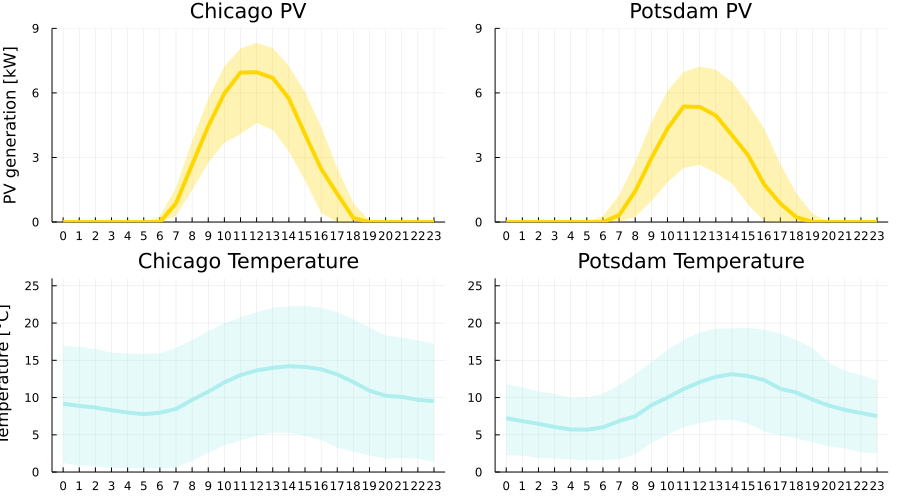

In [67]:
#set common limits of y-axis to compare the plots
PV_ymax = 9;
Temp_ymax = 26;

# what's happening here?
p_CH_PV = plot(h, y_CH[:,3], title="Chicago PV", fillrange=y_CH[:,2], xticks=h, ylabel="PV generation [kW]", 
    label=false, linewidth=0, color=:gold, alpha=0.3, ylim=(0,PV_ymax))
plot!(h, y_CH[:,1], linewidth= 4.0, label=false; color=:gold) # what's happening here?

# what's happening here?
p_P_PV = plot(h, y_P[:,3], title="Potsdam PV",fillrange=y_P[:,2], xticks=h, 
    label=false, linewidth=0, color=:gold, alpha=0.3, ylim=(0,PV_ymax), legend=:topright)
plot!(h, y_P[:,1], xticks=h, linewidth= 4.0, label=false; color=:gold, legendfontsize=6) 

# what's happening here?
p_CH_Temp = plot(h, y_CH[:,6], title="Chicago Temperature",fillrange=y_CH[:,5], xticks=h, 
    ylabel="Temperature [°C]",label=false, linewidth=0, color=:paleturquoise, alpha=0.3, ylim=(0,Temp_ymax))
plot!(h, y_CH[:,4], xticks=h, linewidth= 4.0, label=false; color=:paleturquoise)

# what's happening here?
p_P_Temp = plot(h, y_P[:,6], title="Potsdam Temperature",fillrange=y_P[:,5], xticks=h,
    label=false, linewidth=0,  color=:paleturquoise, alpha=0.3, ylim=(0,Temp_ymax))
plot!(h, y_P[:,4], xticks=h, linewidth= 4.0, label=false, color=:paleturquoise)

plot!(size=(900,500))

# what's happening here?
plot(p_CH_PV, p_P_PV, p_CH_Temp, p_P_Temp, layout=(2,2)) 

In [ ]:
savefig("figures/PV_temp_daily_confidence.pdf")
#savefig("figures/PV_temp_daily_confidence.png")

done 👍